In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

In [9]:
def ajuste_linear(x, y):
    # Calcula o coeficiente 'a' usando regressão linear simples
    a = sum(xi * yi for xi, yi in zip(x, y)) / sum(xi ** 2 for xi in x)
    
    # Aplica o ajuste aos dados de entrada
    x_ajustado = [a * xi for xi in x]
    
    # Retorna os dados de entrada ajustados e o coeficiente 'a'
    return a

def imagem_para_tons_de_cinza(caminho_da_imagem):
    # Abrir a imagem
    imagem = Image.open(caminho_da_imagem)
    
    # Converter para tons de cinza
    imagem_em_tons_de_cinza = imagem.convert('L')
    
    # Retornar a matriz de pixels em tons de cinza
    return imagem_em_tons_de_cinza


def dividir_em_blocos(imagem, t1, t2):
    largura, altura = imagem.size
    blocos = []
    
    # Iterar sobre a imagem em blocos de tamanho t1 x t2
    for y in range(0, altura, t2):
        for x in range(0, largura, t1):
            # Recortar o bloco da imagem
            bloco = imagem.crop((x, y, x + t1, y + t2))
            # Adicionar o bloco à lista de blocos
            blocos.append(bloco)
    
    return blocos

def corte(imagem,valor,tipo):
    largura, altura = imagem.size
    
    # Converter a imagem para tons de cinza, se necessário
    if imagem.mode != 'L':
        imagem = imagem.convert('L')
    
    # Criar uma cópia da imagem
    imagem_filtrada = imagem.copy()
    
    # Obtém a matriz de tons de cinza da imagem filtrada
    matriz_tons_de_cinza = list(imagem_filtrada.getdata())
    
    # Aplicar o filtro na matriz de tons de cinza
    if tipo=='M':
        matriz_filtrada = [255 if pixel < valor else 0 for pixel in matriz_tons_de_cinza]
    if tipo=='m':
        matriz_filtrada = [255 if pixel > valor else 0 for pixel in matriz_tons_de_cinza]
    
    # Atualizar a imagem filtrada com a nova matriz de tons de cinza
    imagem_filtrada.putdata(matriz_filtrada)
    
    return imagem_filtrada


def matriz_para_imagem(matriz_tons_de_cinza):
    largura = len(matriz_tons_de_cinza[0])
    altura = len(matriz_tons_de_cinza)
    
    # Criar uma nova imagem em tons de cinza
    imagem = Image.new('L', (largura, altura))
    
    # Preencher a imagem com os valores da matriz
    for y in range(altura):
        for x in range(largura):
            valor_pixel = 100*matriz_tons_de_cinza[y][x]
            imagem.putpixel((x, y), valor_pixel)
    
    return imagem
    

def tornar_quadrada(imagem):
    largura, altura = imagem.size
    
    # Determinar o tamanho máximo entre a largura e a altura
    tamanho_maximo = max(largura, altura)
    
    # Criar uma nova imagem quadrada
    imagem_quadrada = Image.new('L', (tamanho_maximo, tamanho_maximo), color=255)
    
    # Calcular as coordenadas de início para colar a imagem original
    inicio_x = (tamanho_maximo - largura) // 2
    inicio_y = (tamanho_maximo - altura) // 2
    
    # Colar a imagem original no centro da nova imagem quadrada
    imagem_quadrada.paste(imagem, (inicio_x, inicio_y))
    
    return imagem_quadrada

def dimfrac(imagem):
    largura,altura = imagem.size
    dados = {}
    for i in list(range(largura-1,2,-2)):
        prop = i/largura
        prop_inv = 1/prop
        blocos = dividir_em_blocos(imagem, i, i)
        contagem = 0
        for i, bloco in enumerate(blocos):
            el_nn = np.sum(np.array(bloco)<1)
            if el_nn>0:
                contagem=contagem+1
        dados[contagem]=prop_inv

    tam_lado = list(dados.values())
    num_caixas = list(dados.keys())

    dimensao = np.log(num_caixas)/np.log(tam_lado)
    ajuste = ajuste_linear(np.log(tam_lado[-10:]),np.log(num_caixas)[-10:])
    return {'partes':tam_lado,'caixas':num_caixas, 'dimensao':dimensao,'ajuste':ajuste}

#### Imagem 2

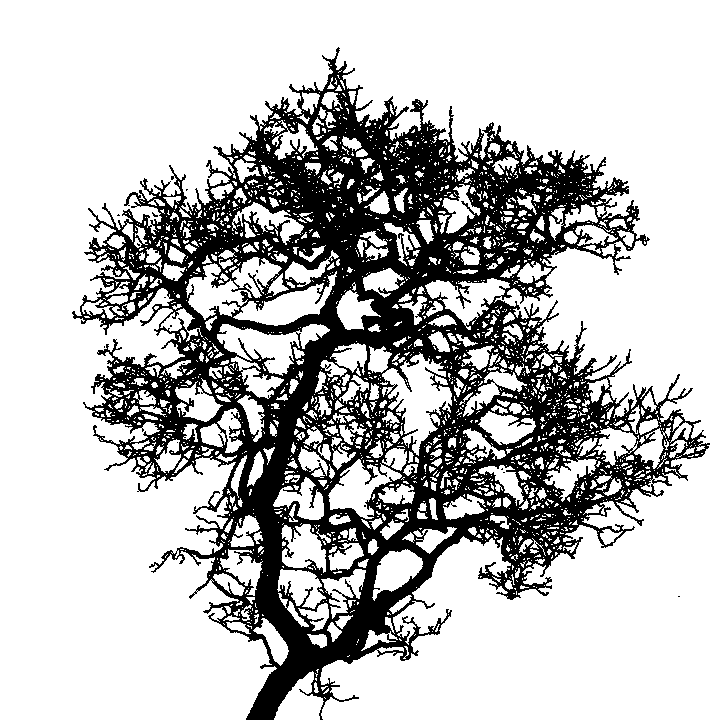

In [24]:
caminho_da_imagem = './imagens/image2.png'
matriz_tons_de_cinza = imagem_para_tons_de_cinza(caminho_da_imagem)
imagem_processada = tornar_quadrada(corte(matriz_tons_de_cinza,5,'M'))
imagem_processada

In [25]:
res = dimfrac(imagem_processada)
res["ajuste"]

1.8359120942639

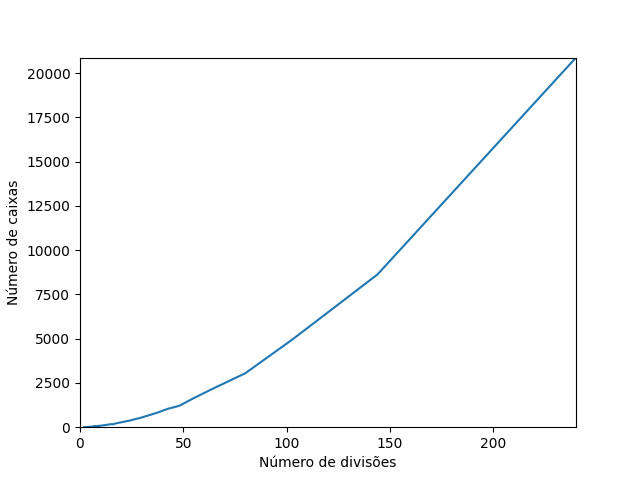

In [26]:
fig,ax = plt.subplots()
ax.plot(res['partes'],res['caixas'])
ax.set_xlim(0,max(res['partes']))
ax.set_ylim(0,max(res['caixas']))
ax.set_xlabel('Número de divisões')
ax.set_ylabel('Número de caixas')
plt.show()

#### Imagem 4

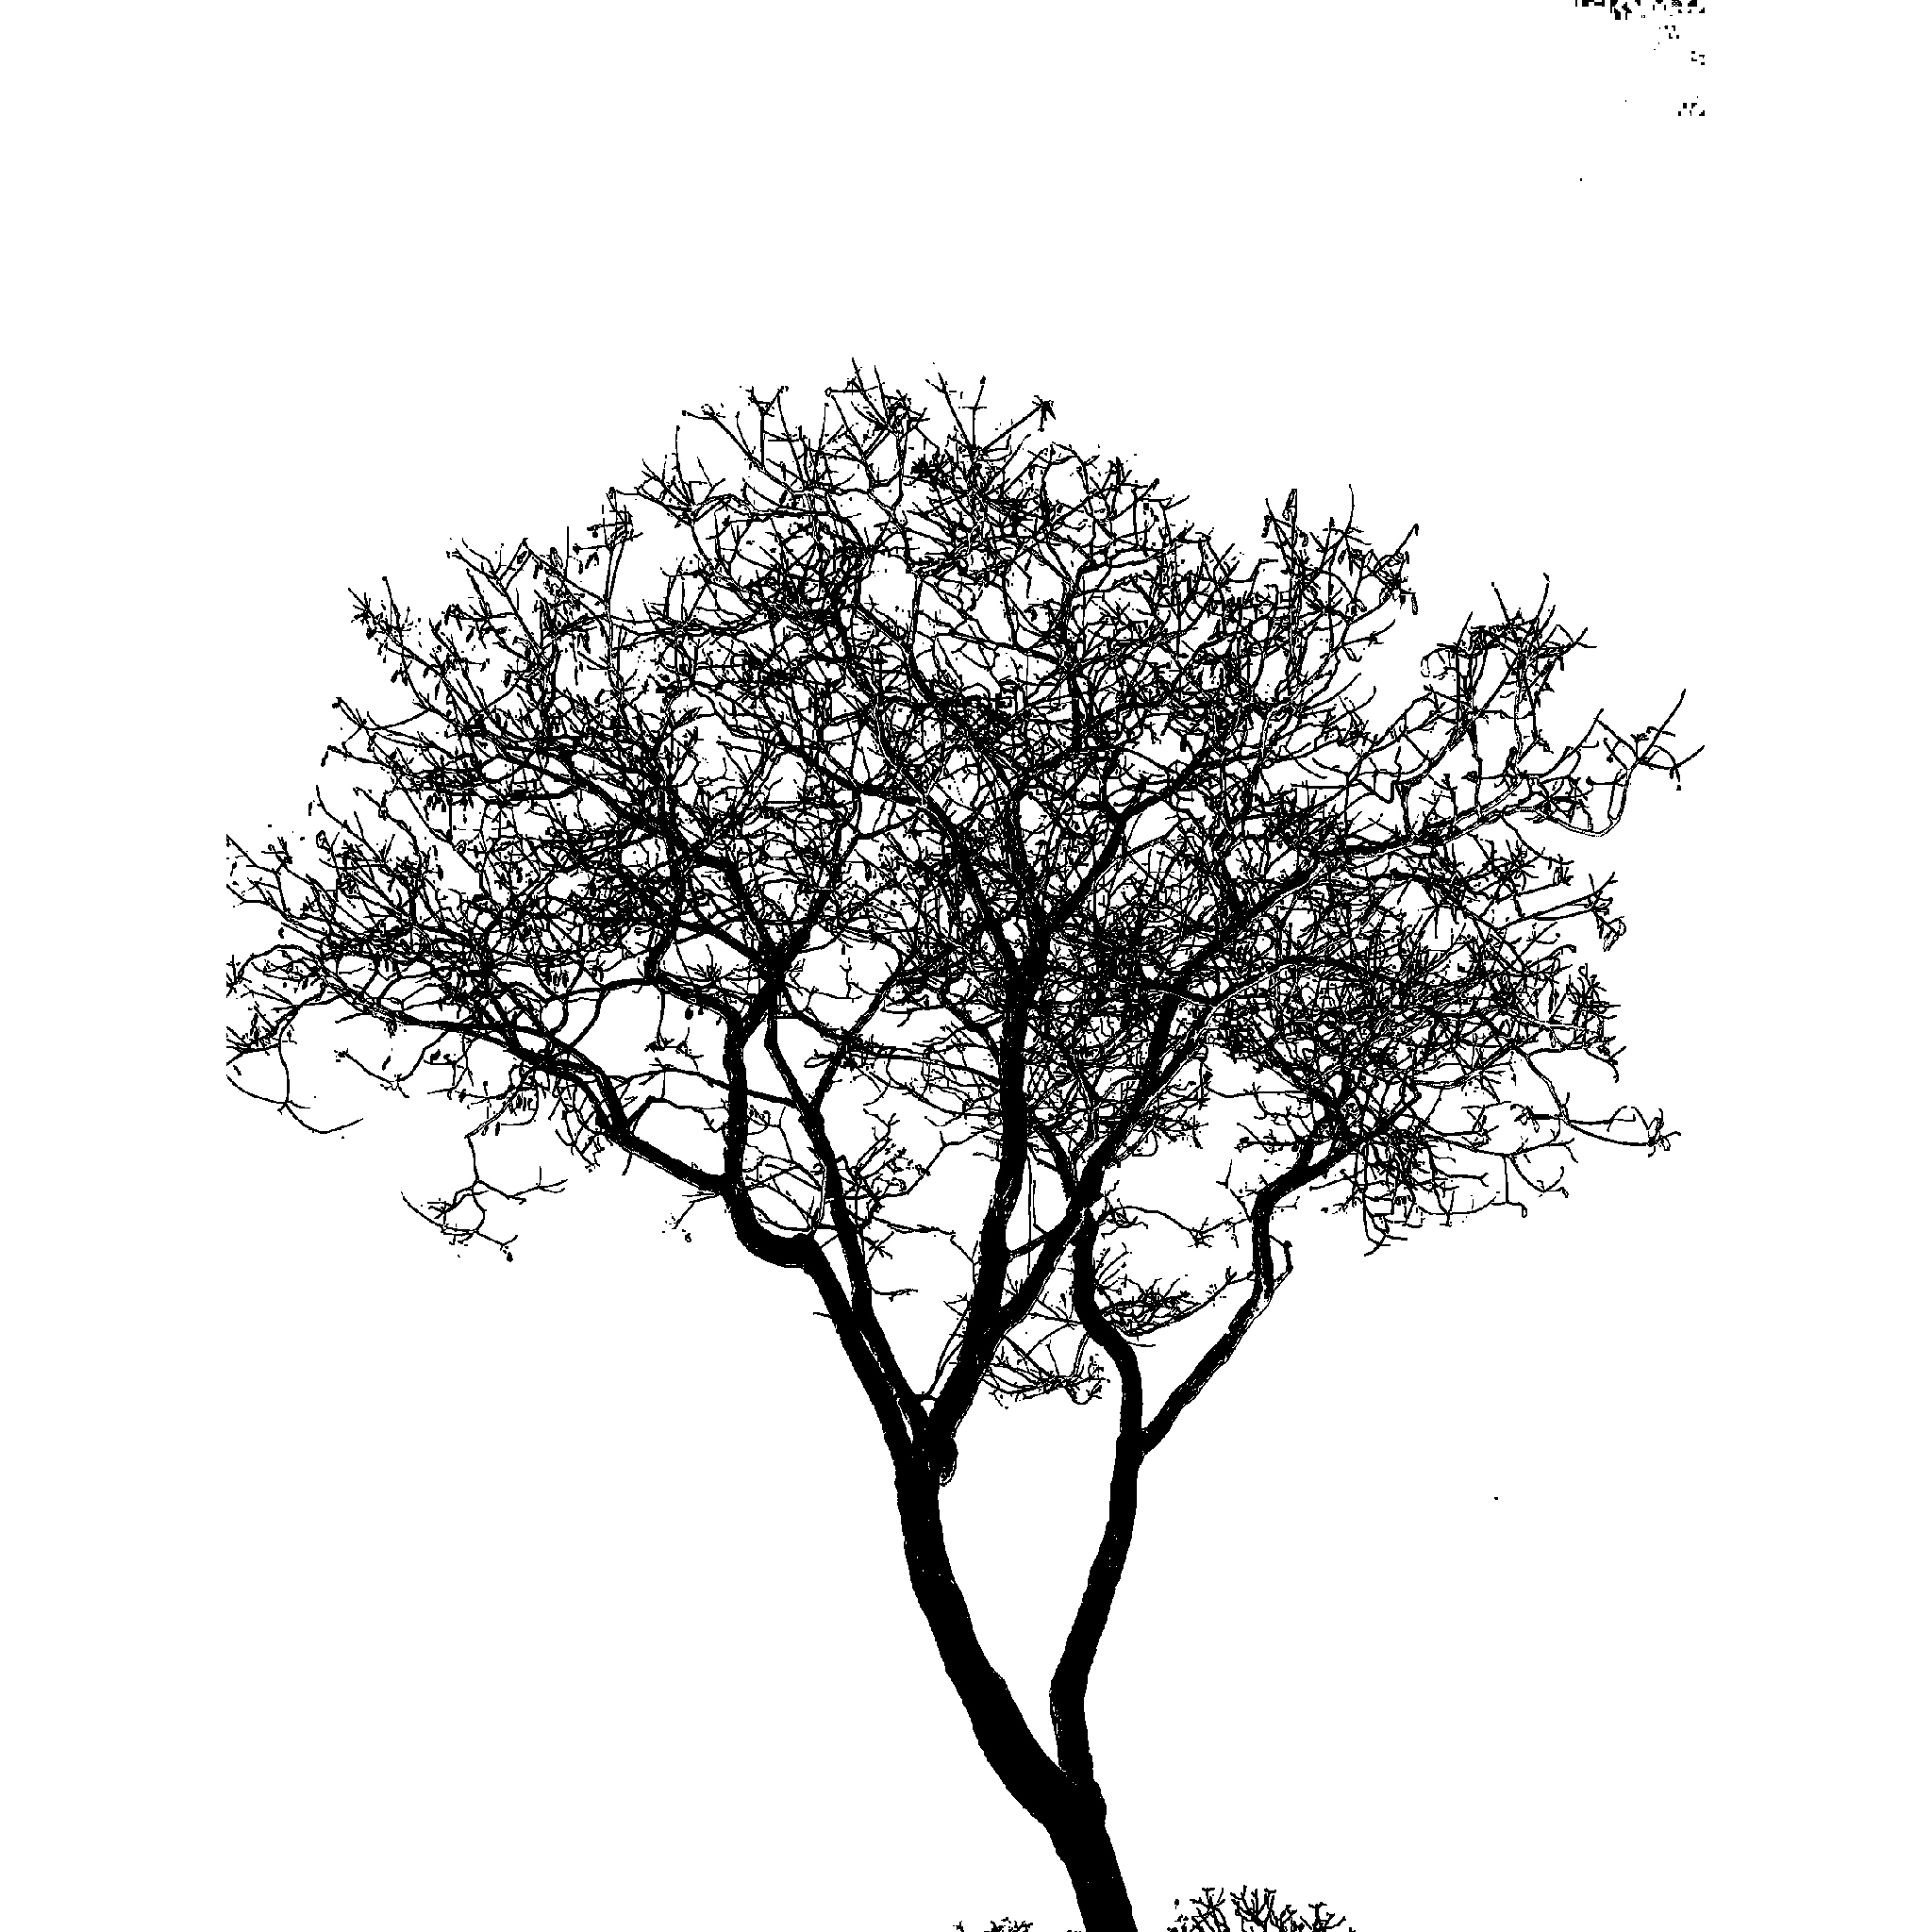

In [20]:
caminho_da_imagem = './imagens/image4.png'
matriz_tons_de_cinza = imagem_para_tons_de_cinza(caminho_da_imagem)
imagem_processada = tornar_quadrada(corte(matriz_tons_de_cinza,5,'M'))
imagem_processada

In [21]:
res = dimfrac(imagem_processada)
res["ajuste"]

1.749627071177551

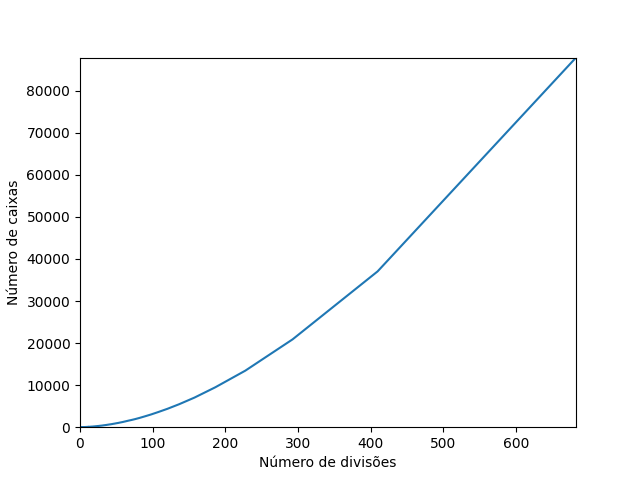

In [23]:
fig,ax = plt.subplots()
ax.plot(res['partes'],res['caixas'])
ax.set_xlim(0,max(res['partes']))
ax.set_ylim(0,max(res['caixas']))
ax.set_xlabel('Número de divisões')
ax.set_ylabel('Número de caixas')
plt.show()

#### Imagem 6

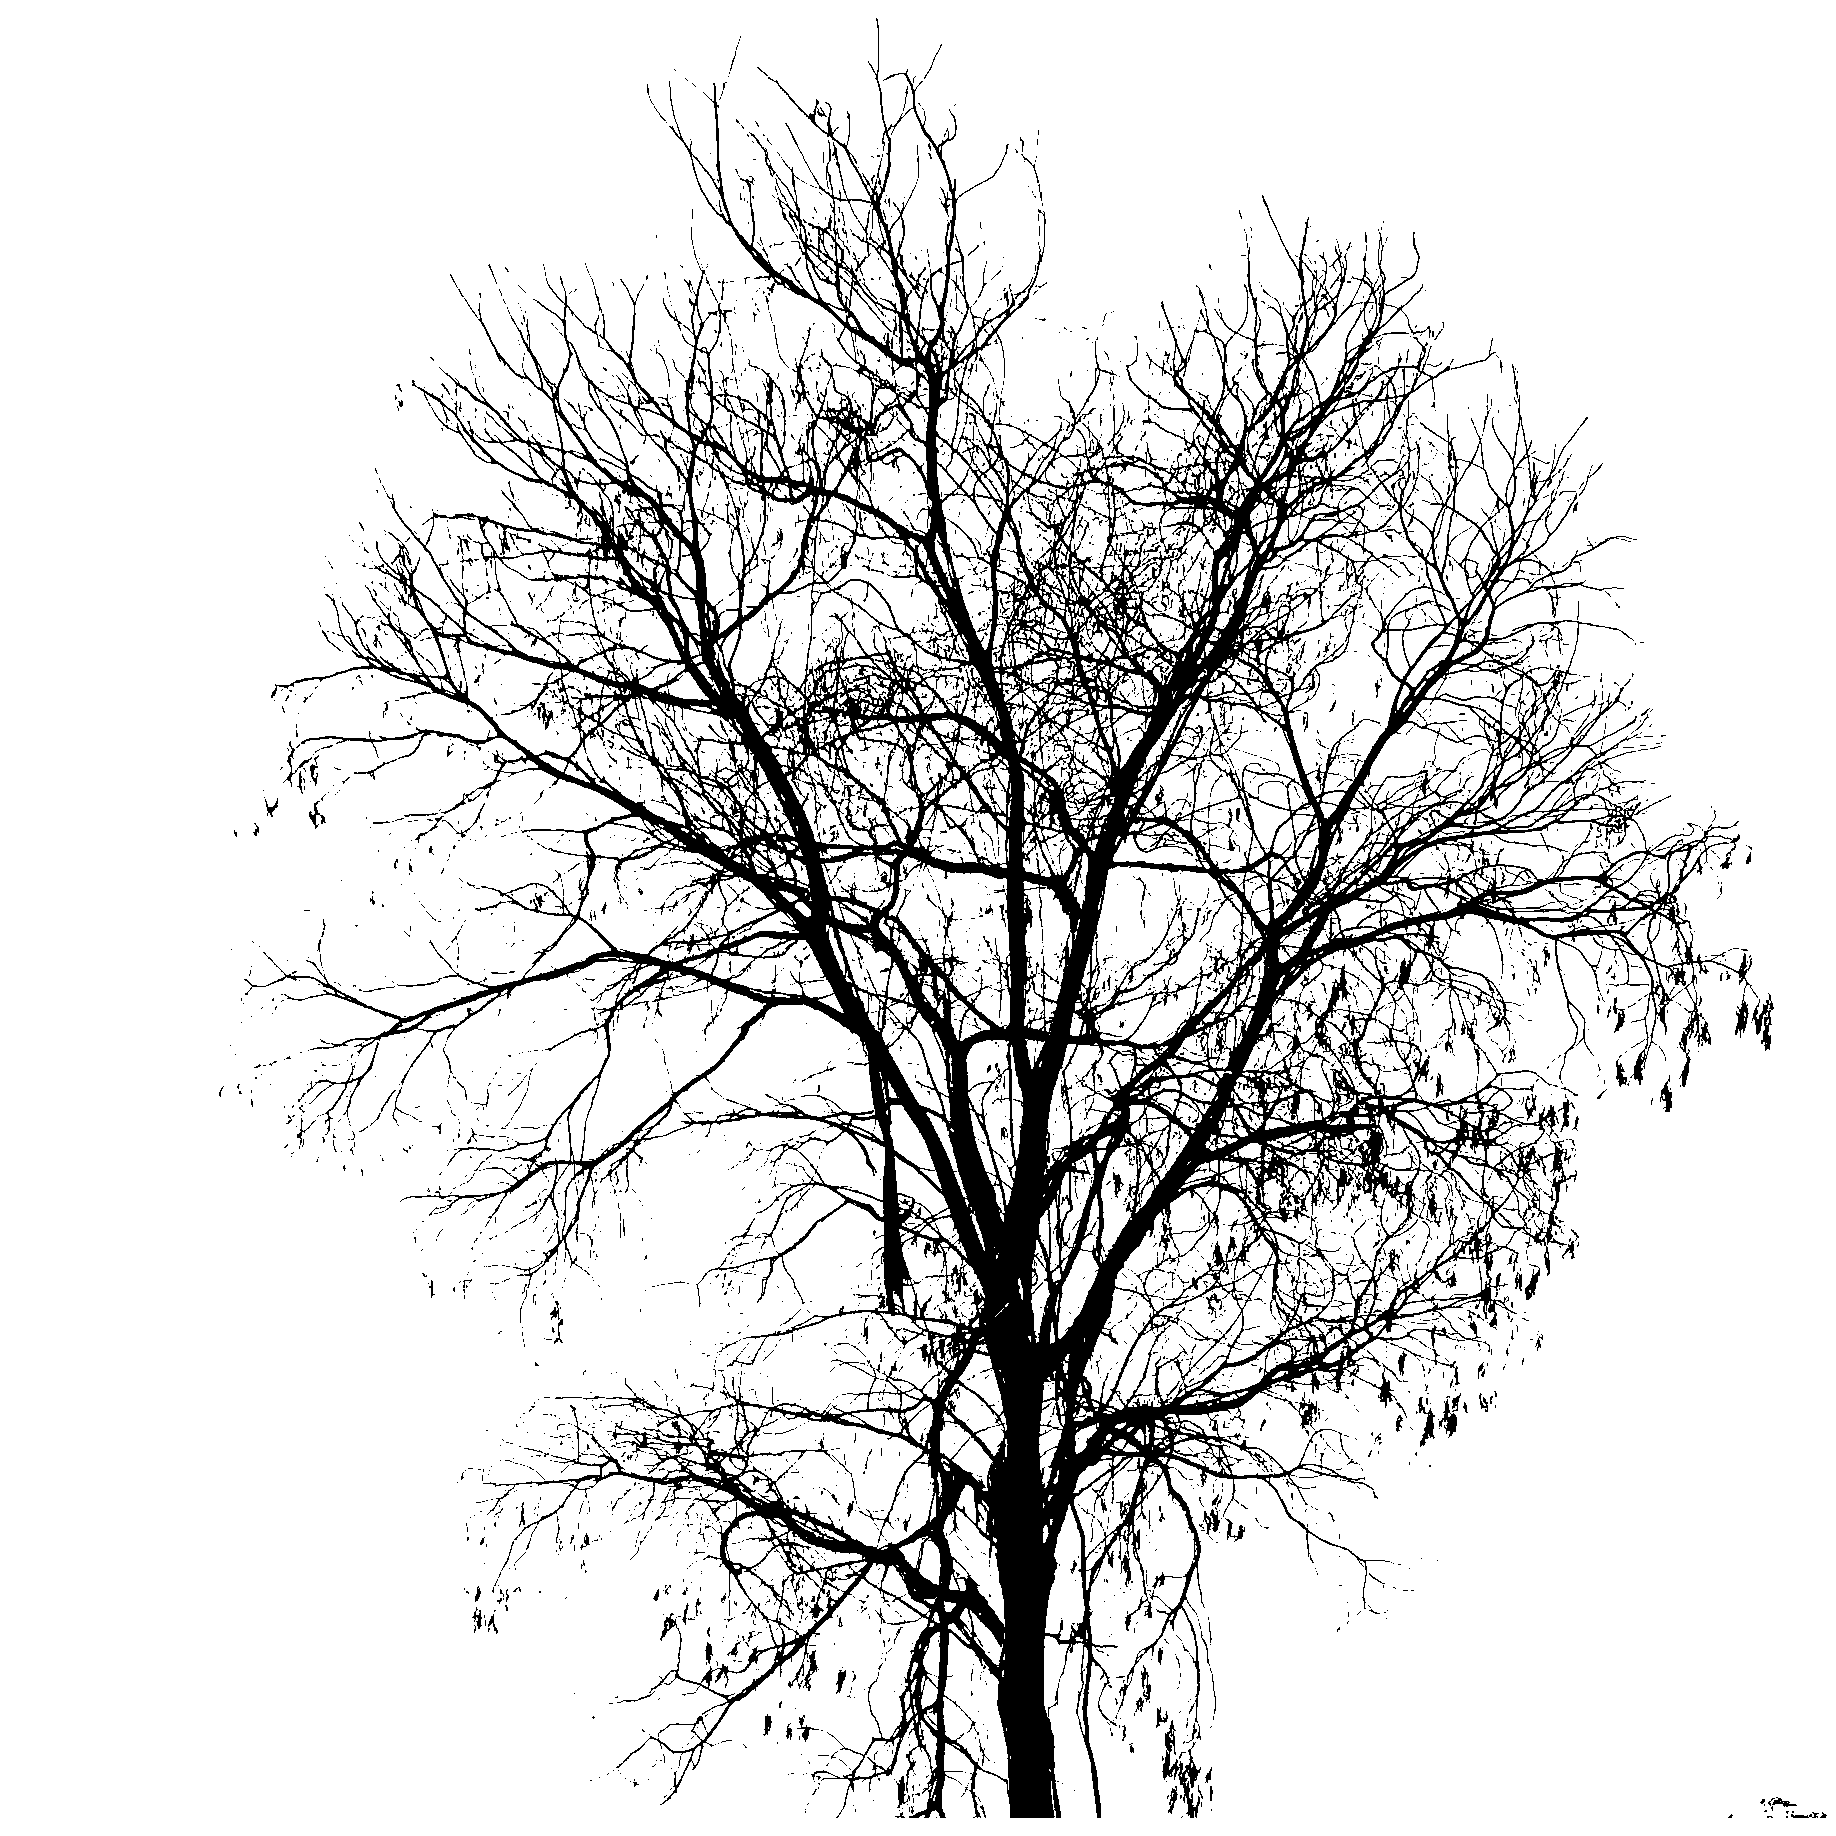

In [32]:
caminho_da_imagem = './imagens/image6_1.png'
matriz_tons_de_cinza = imagem_para_tons_de_cinza(caminho_da_imagem)
imagem_processada = tornar_quadrada(corte(matriz_tons_de_cinza,100,'m'))
imagem_processada

In [33]:
res = dimfrac(imagem_processada)
res["ajuste"]

1.8298626947529426

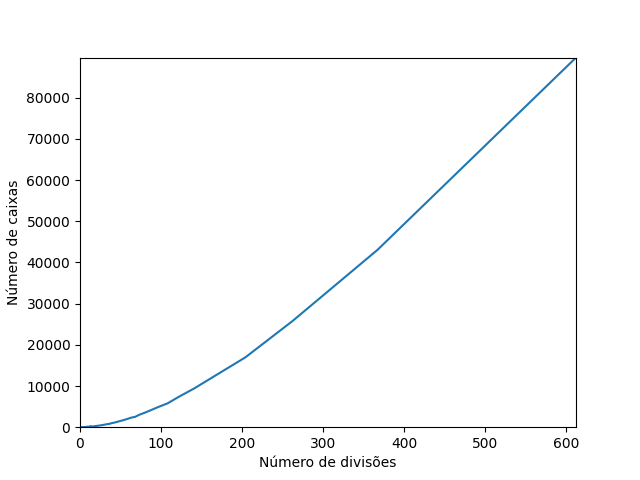

In [34]:
fig,ax = plt.subplots()
ax.plot(res['partes'],res['caixas'])
ax.set_xlim(0,max(res['partes']))
ax.set_ylim(0,max(res['caixas']))
ax.set_xlabel('Número de divisões')
ax.set_ylabel('Número de caixas')
plt.show()

#### Imagem 7

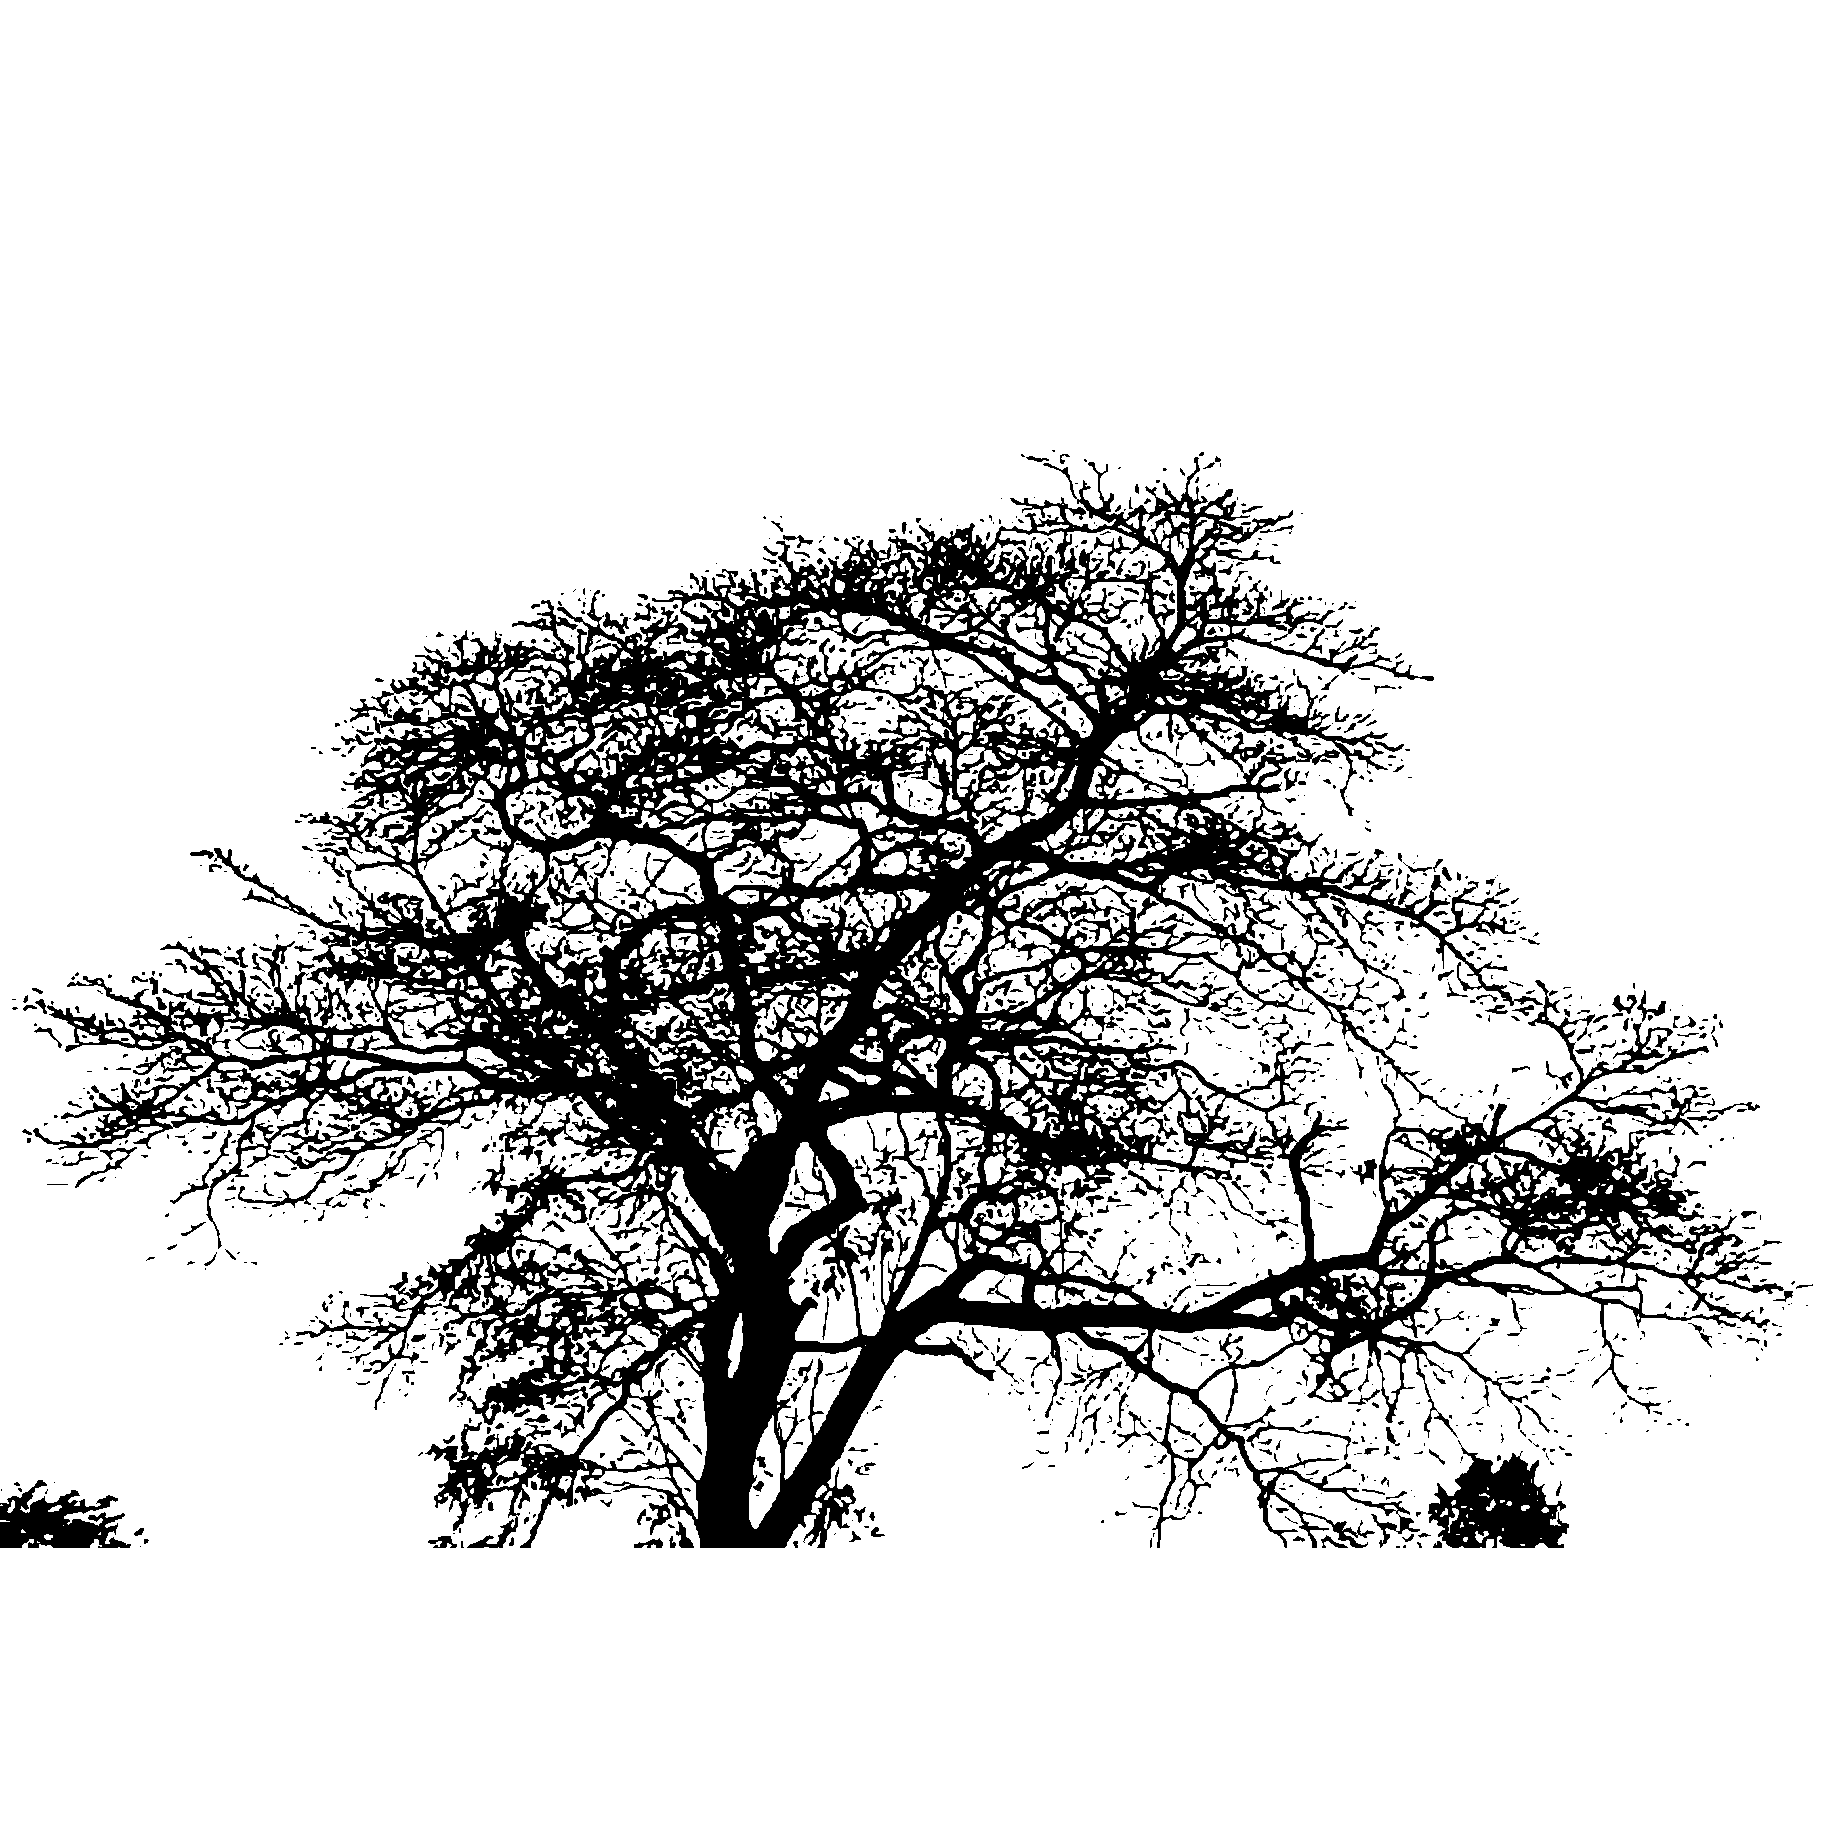

In [36]:
caminho_da_imagem = './imagens/image7.png'
matriz_tons_de_cinza = imagem_para_tons_de_cinza(caminho_da_imagem)
imagem_processada = tornar_quadrada(corte(matriz_tons_de_cinza,150,'m'))
imagem_processada

In [38]:
res = dimfrac(imagem_processada)
res["ajuste"]

1.7930112988830431

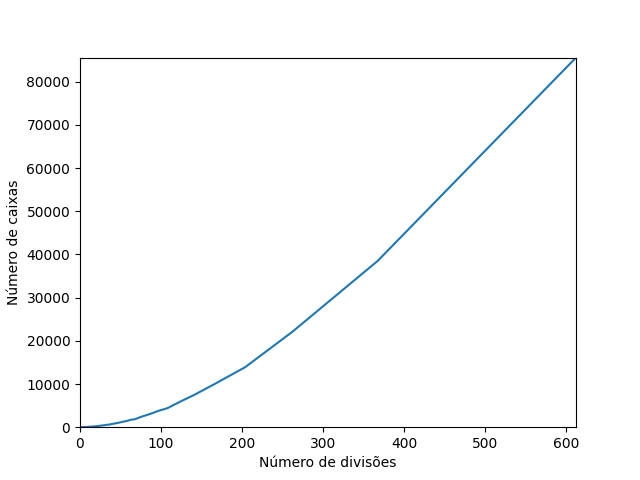

In [39]:
fig,ax = plt.subplots()
ax.plot(res['partes'],res['caixas'])
ax.set_xlim(0,max(res['partes']))
ax.set_ylim(0,max(res['caixas']))
ax.set_xlabel('Número de divisões')
ax.set_ylabel('Número de caixas')
plt.show()

#### Imagem 8

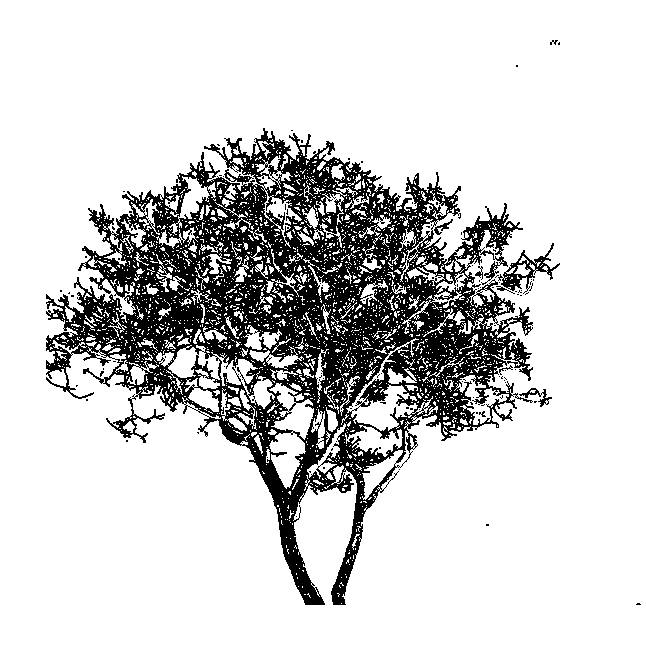

In [67]:
caminho_da_imagem = './imagens/image8.png'
matriz_tons_de_cinza = imagem_para_tons_de_cinza(caminho_da_imagem)
imagem_processada = tornar_quadrada(corte(matriz_tons_de_cinza,33,'M'))
imagem_processada

In [68]:
res = dimfrac(imagem_processada)
res["ajuste"]

1.7542247354231817

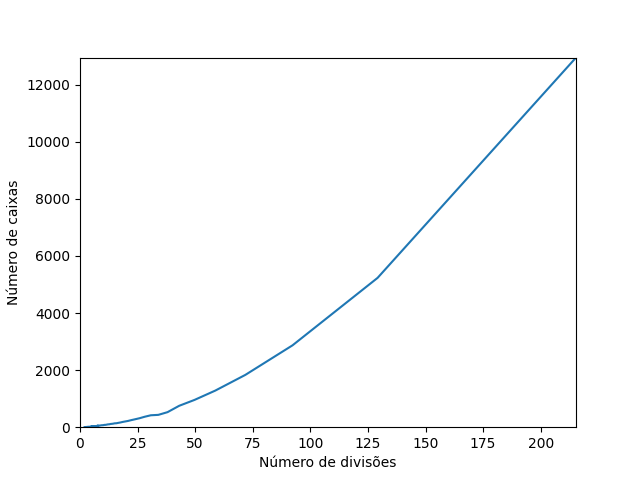

In [69]:
fig,ax = plt.subplots()
ax.plot(res['partes'],res['caixas'])
ax.set_xlim(0,max(res['partes']))
ax.set_ylim(0,max(res['caixas']))
ax.set_xlabel('Número de divisões')
ax.set_ylabel('Número de caixas')
plt.show()

#### imagem 27

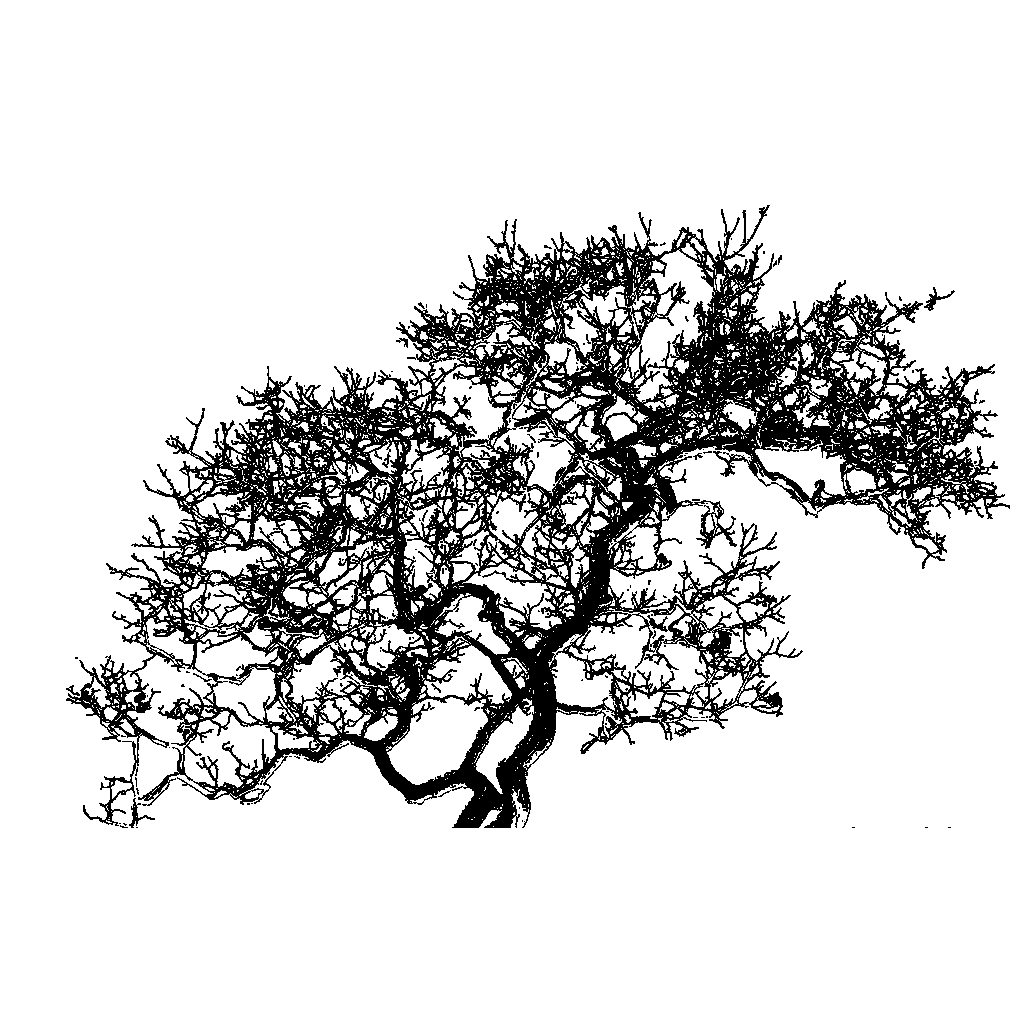

In [73]:
caminho_da_imagem = './imagens/image27_1.png'
matriz_tons_de_cinza = imagem_para_tons_de_cinza(caminho_da_imagem)
imagem_processada = tornar_quadrada(corte(matriz_tons_de_cinza,10,'M'))
imagem_processada

In [74]:
res = dimfrac(imagem_processada)
res["ajuste"]

1.766344668894447

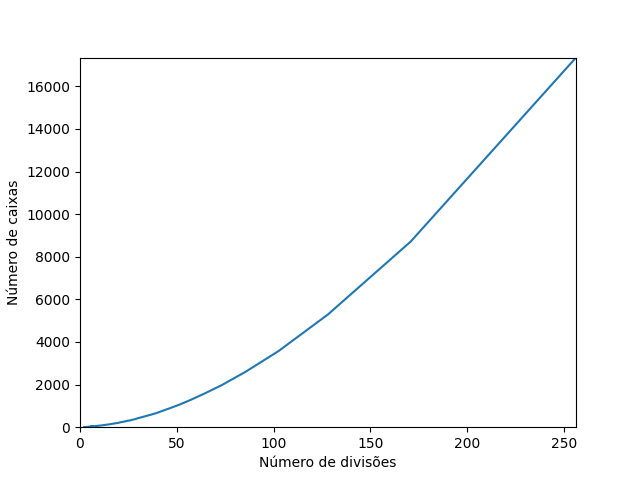

In [75]:
fig,ax = plt.subplots()
ax.plot(res['partes'],res['caixas'])
ax.set_xlim(0,max(res['partes']))
ax.set_ylim(0,max(res['caixas']))
ax.set_xlabel('Número de divisões')
ax.set_ylabel('Número de caixas')
plt.show()

### imagem 33

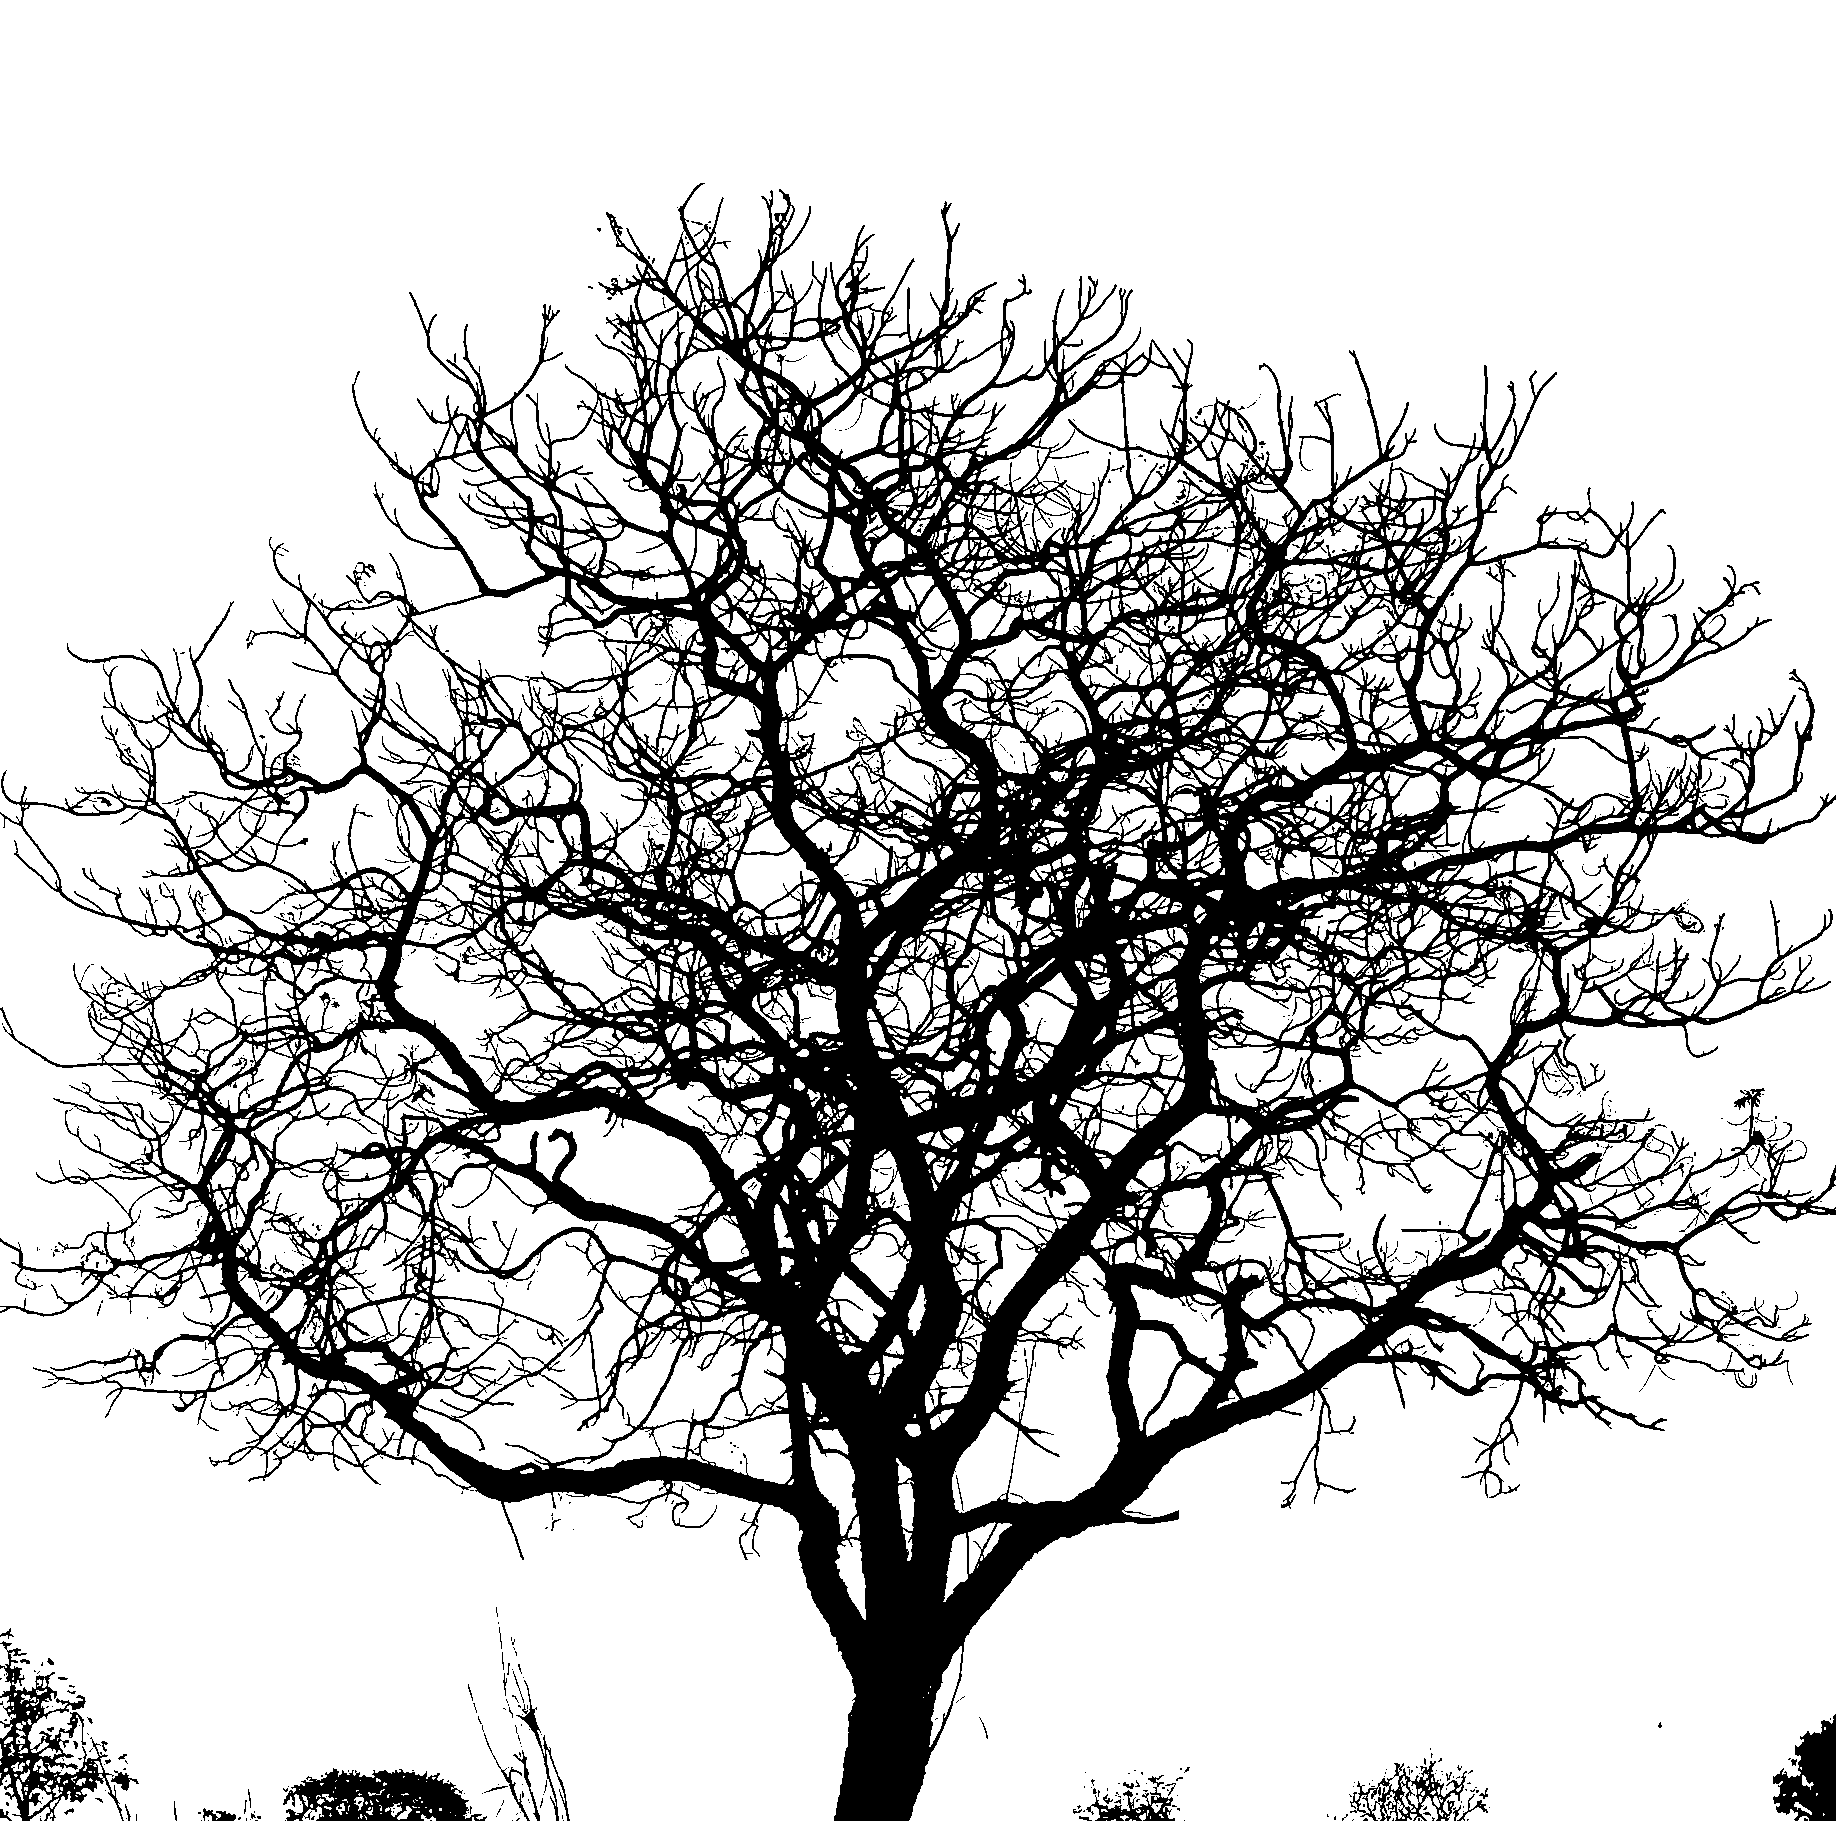

In [80]:
caminho_da_imagem = './imagens/image33.png'
matriz_tons_de_cinza = imagem_para_tons_de_cinza(caminho_da_imagem)
imagem_processada = tornar_quadrada(corte(matriz_tons_de_cinza,150,'m'))
imagem_processada

In [81]:
res = dimfrac(imagem_processada)
res["ajuste"]

1.8575798759816111

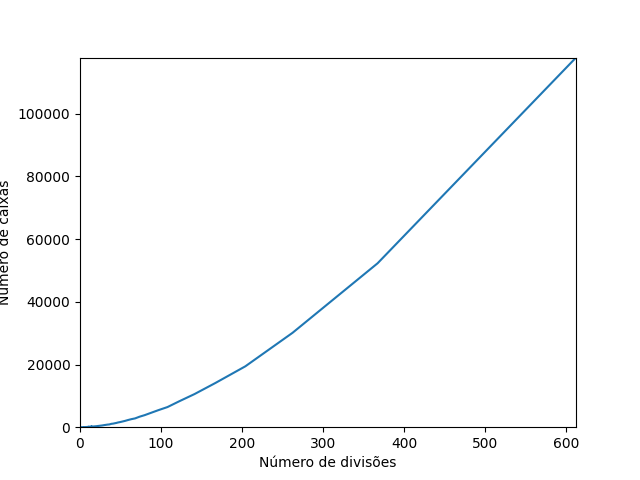

In [82]:
fig,ax = plt.subplots()
ax.plot(res['partes'],res['caixas'])
ax.set_xlim(0,max(res['partes']))
ax.set_ylim(0,max(res['caixas']))
ax.set_xlabel('Número de divisões')
ax.set_ylabel('Número de caixas')
plt.show()